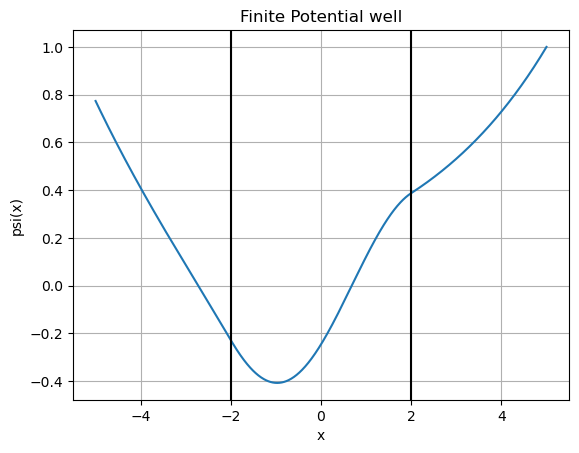

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Integration accuracy of solution
numsteps = 1000
stepwidth = 0.001

# Integration bounds
x = np.linspace(5, -5, numsteps + 1)

# Properties of potential well
V0 = 50
wellwidth = 2

# Physical properties of system
hbar = 1
m = 1
E = 45             # <- Can't make this greater than V0, or else particle won't be trapped in well

# Initial conditions
psi1 = [1]
psi2 = [- (np.sqrt(2 * m * (V(x[0]) - E)) / hbar) * psi1[0]]

# Define potential well
def V(x):
    return 0 if abs(x) <= wellwidth else V0

for i in range(numsteps):
    
    y1 = stepwidth * psi2[-1]
    dy1dx = stepwidth * (2 * m / hbar**2) * (V(x[i]) - E) * psi1[-1]

    y2 = stepwidth * (psi2[-1] + dy1dx / 2)
    dy2dx = stepwidth * (2 * m / hbar**2) * (V(x[i] - stepwidth / 2) - E) * (psi1[-1] + y1 / 2)

    y3 = stepwidth * (psi2[-1] + dy2dx / 2)
    dy3dx = stepwidth * (2 * m / hbar**2) * (V(x[i] - stepwidth / 2) - E) * (psi1[-1] + y2 / 2)

    y4 = stepwidth * (psi2[-1] + dy3dx)
    dy4dx = stepwidth * (2 * m / hbar**2) * (V(x[i] - stepwidth) - E) * (psi1[-1] + y3)

    psi1.append(psi1[-1] + (y1 + 2*y2 + 2*y3 + y4) / 6)
    psi2.append(psi2[-1] + (dy1dx + 2*dy2dx + 2*dy3dx + dy4dx) / 6)

plt.plot(x, psi1)
plt.axvline(wellwidth, color='black')
plt.axvline(-wellwidth, color='black')
plt.title("Finite Potential well")
plt.xlabel("x")
plt.ylabel("psi(x)")
plt.grid(True)
plt.show()